In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from random import random
from copy import deepcopy

In [24]:
X = np.reshape([random()*100 for i in range(400)],(200,2))

In [25]:
col_max = np.amax(X,axis=0)
col_min = np.amin(X,axis=0)
centroid = (col_max + col_min)/2

In [26]:
Z = (X-centroid)**2

In [27]:
alpha = (1.0 / 200) * np.ones(200)

In [28]:
ZT = Z.T
h = np.matmul(alpha,Z)
h

array([723.52244137, 816.31824824])

In [29]:
def isclose(a, b, rel_tol, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

In [30]:
isclose(1.00,1.002,1e-02)

True

In [31]:
def calc_s(h,alpha_old,Z,u,i):
  ans=0
  for j in range(2):
            s_i_j = h[j] - alpha_old[i]*Z[i][j]
            ans += (1/(u + s_i_j/Z[i][j]))
  return ans

In [32]:
def binary(h,alpha_old,Z,i,low,high):
  mid=(low+high)/2
  temp_ans=calc_s(h,alpha_old,Z,mid,i)
  while(not isclose(temp_ans,1,1e-05)):
    # print(abs(temp_ans-1))
    if(temp_ans>1):
      low=mid
    elif(temp_ans<1):
      high=mid
    else:
      return mid
    mid = (low+high)/2
    # print(low,high,mid)
    temp_ans=calc_s(h,alpha_old,Z,mid,i)
  return mid

In [33]:
def helper(h,alpha_old,Z,u,i):

    u_old=u # this 0.00001 is step which i am decreasing the u for binary search..
    
    while(calc_s(h,alpha_old,Z,u,i)>1):
        u_old=u
        u*=2        
    if u_old == u:
        u = binary(h,alpha_old,Z,i,0,1)
    else:
        u =binary(h,alpha_old,Z,i,u_old,u)
    return u

In [34]:
def solution(Z,alpha,h,tol):
    i = 0
    updates = 0
    converged = False
    alpha_old = np.zeros(200)
    old = 0
        
    while i < 200:
        if converged:
            return h,alpha
        alpha_old[i] = alpha[i]
        f_x = 0
        u=0
        f_x=calc_s(h,alpha_old,Z,u,i)
        
        if f_x == 1:
            alpha[i] = u
        
        if f_x < 1:

            alpha[i] = 0

        if f_x > 1:
            alpha[i]= helper(h,alpha_old,Z,1,i)
            
                
        h = h + (alpha[i] - alpha_old[i])*Z[i]
        i += 1
        if i>=199 :
            i = 0
            updates += 1
            if old == 0:
                stored_alpha_old = deepcopy(alpha_old)
                old = 1
        if updates == 4:
            if np.all(alpha - stored_alpha_old) < tol :  #.00001
                converged = True
            else:
                updates = 0
                stored_alpha_old = deepcopy(alpha)
    

In [35]:
h,alpha = solution(Z,alpha,h,1e-05)
h

array([4334.65683102, 4236.75407345])

## weight vectors obtained are:

In [36]:
v = 1/h
temp_v=v
temp_v

array([0.0002307 , 0.00023603])

In [37]:
c = np.median(X,axis=0)
c

array([50.26939498, 50.22437353])

In [38]:
import math
width = 2/math.sqrt(v[0]) 
height = 2/math.sqrt(v[1])
width,height

(131.67622155905198, 130.18070630389252)

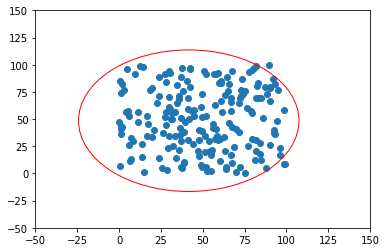

In [39]:
from matplotlib.patches import Ellipse

plt.figure()
ax = plt.gca()
plt.xlim(-50,150)
plt.ylim(-50,150)

ellipse = Ellipse(xy=(41.65098395, 48.50360728), width=width, height=height)
ellipse.fill = False
ellipse.set_ec('red')
ax.add_patch(ellipse)
plt.scatter(x = X[::,0], y = X[::,1])
plt.show()

## visualising the ellipsoid with data points


In [40]:
from __future__ import division
import numpy as np
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

In [41]:
U=np.diag(alpha)
center=np.dot(X.T,alpha)
A = (1/4) * la.inv(np.dot(np.dot(X.T,U), X) - np.dot(center.T,center))   
A

array([[ 7.30447437e-06, -1.87358198e-05],
       [-1.87358198e-05,  1.90448405e-05]])

In [42]:
# point it and some other stuff
U, D, V = la.svd(A)  
D = D[:-1]  
V = V[:-1,:-1]
# print(D.shape)
rx, ry, rz = [1/np.sqrt(d) for d in D]
u, v = np.mgrid[0:2*np.pi:20j,-np.pi/2:np.pi/2:10j]    


x=rx*np.cos(u)*np.cos(v)
y=ry*np.sin(u)*np.cos(v)
z=rz*np.sin(v)
print(rx)
# print(y)
# print(z)
for idx in range(x.shape[0]):
    for idy in range(y.shape[1]):
        x[idx,idy],y[idx,idy],z[idx,idy] = np.dot(np.transpose(V),np.array([x[idx,idy],y[idx,idy],z[idx,idy]])) + centroid[:-1]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])    
ax.plot_surface(x, y, z, cstride = 10, rstride = 1, alpha = 0.3)
plt.show()

ValueError: not enough values to unpack (expected 3, got 1)

In [ ]:
## temp
pi = np.pi
sin = np.sin
cos = np.cos

def mvee(points, tol = 0.001):
    """
    Finds the ellipse equation in "center form"
    (x-c).T * A * (x-c) = 1
    """
    N, d = points.shape
    Q = np.column_stack((points, np.ones(N))).T
    err = tol+1.0
    u = np.ones(N)/N
    while err > tol:
        # assert u.sum() == 1 # invariant
        X = np.dot(np.dot(Q, np.diag(u)), Q.T)
        M = np.diag(np.dot(np.dot(Q.T, la.inv(X)), Q))
        jdx = np.argmax(M)
        step_size = (M[jdx]-d-1.0)/((d+1)*(M[jdx]-1.0))
        new_u = (1-step_size)*u
        new_u[jdx] += step_size
        err = la.norm(new_u-u)
        u = new_u
    c = np.dot(u,points)        
    A = la.inv(np.dot(np.dot(points.T, np.diag(u)), points)
               - np.multiply.outer(c,c))/d
    return A, c

In [ ]:
%matplotlib inline

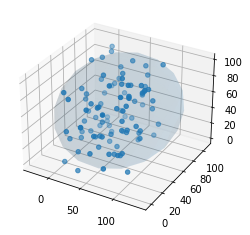

In [ ]:
A, centroid = mvee(X)    
U, D, V = la.svd(A)   
# print(D) 
rx, ry, rz = [1/np.sqrt(d) for d in D[:-1]]
u, v = np.mgrid[0:2*pi:20j, -pi/2:pi/2:10j]

def ellipse(u,v):
    x = rx*cos(u)*cos(v)
    y = ry*sin(u)*cos(v)
    z = rz*sin(v)
    return x,y,z

E = np.dstack(ellipse(u,v))
# while()
E = np.dot(E,V[[3,2,1],:][:,[3,2,1]]) + centroid[[3,2,1]]
x, y, z = np.rollaxis(E, axis = -1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cstride = 1, rstride = 1, alpha = 0.1)
ax.scatter(X[:,0],X[:,1],X[:,2])

plt.show()